#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


### 1. Data Inspection
#### overview the data set

In [2]:
data=pd.read_csv('greenfield.csv')
data.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


#### Get the information and the summary statistics of the data set

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,...,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,...,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,...,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,...,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,...,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,...,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


### 2. Data Cleaning 
#### Checking the null cell and the percentage

In [4]:
print(data.isnull().sum())
null_percent=data.isnull().sum()*100/len(data)
null_percent

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilize

ID                                     0.000000
District                               0.000000
Block                                  0.000000
CultLand                               0.000000
CropCultLand                           0.000000
LandPreparationMethod                  0.000000
CropTillageDate                        0.000000
CropTillageDepth                       0.000000
CropEstMethod                          0.000000
RcNursEstDate                          2.144703
SeedingSowingTransplanting             0.000000
SeedlingsPerPit                        7.467700
NursDetFactor                          7.467700
TransDetFactor                         7.467700
TransplantingIrrigationHours           4.987080
TransplantingIrrigationSource          2.971576
TransplantingIrrigationPowerSource    12.997416
TransIrriCost                         22.790698
StandingWater                          6.149871
OrgFertilizers                        34.496124
Ganaura                               62

#### Removing the unnecessary column from the data set

In [5]:
unnecessary_column=['2appDaysUrea','2tdUrea','BasalUrea','Ganaura','CropOrgFYM']
workingData=data.drop(unnecessary_column,axis=1)


#### delete some empty cell

In [6]:
allColumns=[column for column in workingData.columns]
column_to_be_dropped=[col for col in allColumns if null_percent[col]<5]
print(column_to_be_dropped)

for col in column_to_be_dropped:
    workingData.dropna(subset=[col], inplace=True)
print(workingData.isnull().sum())


['ID', 'District', 'Block', 'CultLand', 'CropCultLand', 'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'TransplantingIrrigationHours', 'TransplantingIrrigationSource', 'NoFertilizerAppln', 'CropbasalFerts', 'MineralFertAppMethod', 'Harv_method', 'Harv_date', 'Threshing_date', 'Threshing_method', 'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre', 'Yield']
ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                            0
SeedingSowingTransplanting               0
SeedlingsPerPit                        201
NursDetFactor                          2

#### selecting the numeric column and replacing their empty celll with values

In [7]:
numericData=workingData.select_dtypes(include=[np.number])
numericDataColumns=[col for col in numericData.columns]
for col in numericDataColumns:
    workingData[col] = pd.to_numeric(workingData[col], errors="coerce")
    workingData.fillna(workingData[col].mean(),inplace=True)
workingData.isnull().sum()

ID                                    0
District                              0
Block                                 0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0
CropTillageDate                       0
CropTillageDepth                      0
CropEstMethod                         0
RcNursEstDate                         0
SeedingSowingTransplanting            0
SeedlingsPerPit                       0
NursDetFactor                         0
TransDetFactor                        0
TransplantingIrrigationHours          0
TransplantingIrrigationSource         0
TransplantingIrrigationPowerSource    0
TransIrriCost                         0
StandingWater                         0
OrgFertilizers                        0
PCropSolidOrgFertAppMethod            0
NoFertilizerAppln                     0
CropbasalFerts                        0
BasalDAP                              0
MineralFertAppMethod                  0


In [8]:
workingData.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000
mean,27.657578,23.713867,4.522427,4.130511,8.310759,297.933796,4.308986,2.133099,13.160424,14.574253,28.603570,536.706966,26.409557,11.600704,0.291247,597.900322
std,28.551780,25.494734,1.107828,9.774732,44.226014,397.717423,5.517869,0.624893,9.491897,9.788062,11.445875,1167.799139,3.225487,6.743307,0.213762,686.240848
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,11.000000,10.000000,4.000000,2.000000,2.000000,98.000000,2.000000,2.000000,6.000000,7.000000,24.000000,150.000000,25.000000,10.000000,0.156250,280.000000
50%,20.000000,18.000000,4.000000,2.000000,4.000000,200.000000,3.000000,2.000000,10.000000,12.000000,27.657578,400.000000,26.000000,10.000000,0.227273,410.000000
75%,32.000000,30.000000,5.000000,3.000000,6.000000,400.000000,4.000000,3.000000,16.000000,20.000000,35.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,420.000000,400.000000,8.000000,442.000000,2000.000000,6000.000000,27.657578,4.000000,100.000000,90.000000,332.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


### 3. Explanatory data analysis (EDA)
#### Showing the distribution of the numeric data

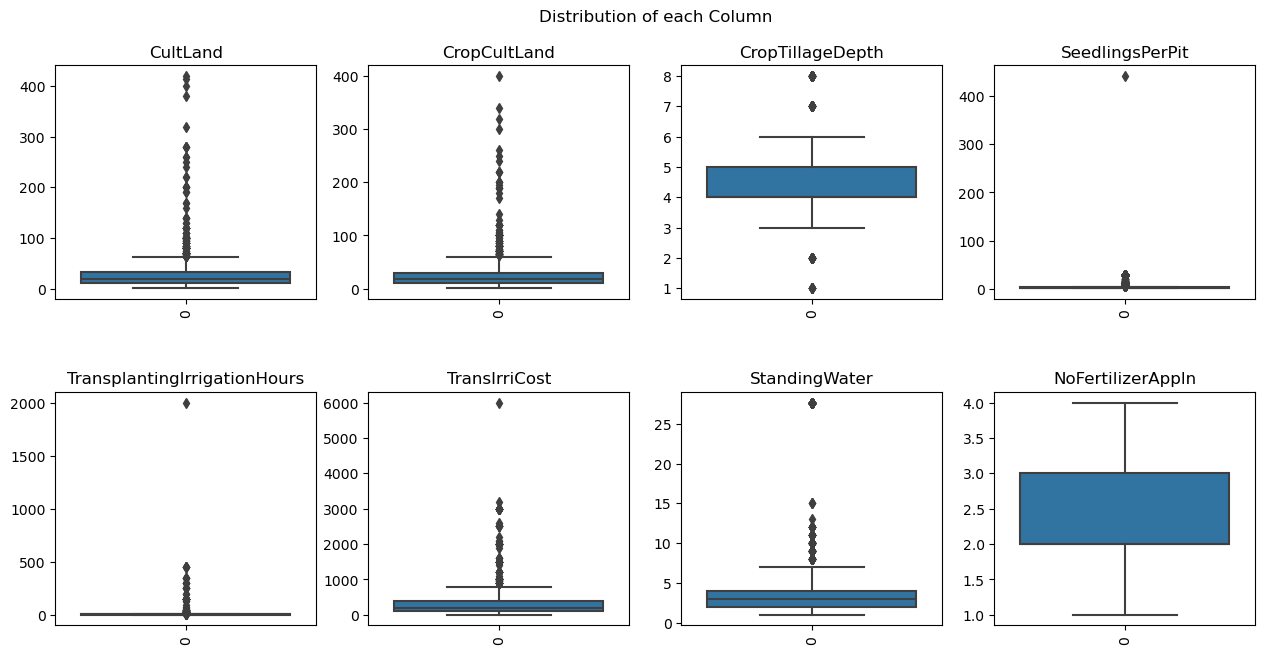

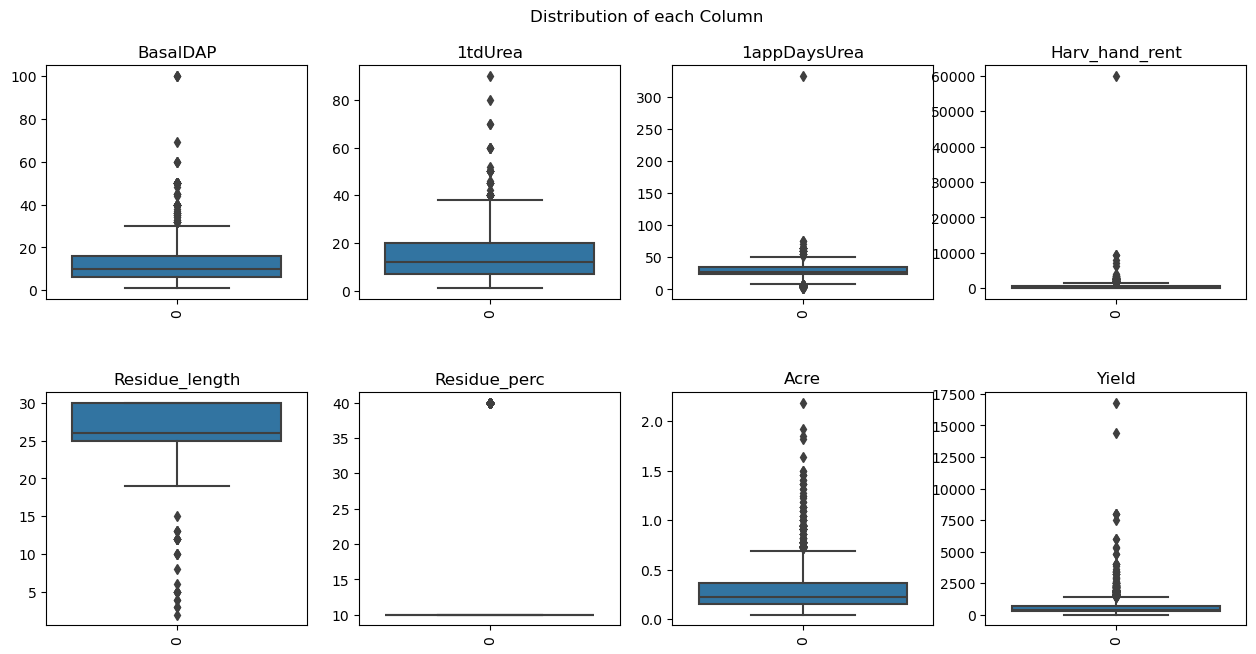

In [9]:
def DistributionOfNumericColumn(start,end):
    i=1
    plt.figure(figsize=(20, 7))
    for col in numericDataColumns[start:end]:
        plt.subplot(2,4,i)
        sns.boxplot(data=workingData[col])
        plt.subplots_adjust(left=0.2,right=0.8,top=0.9,bottom=0.1,wspace=0.2
                        ,hspace=0.4)
        plt.suptitle("Distribution of each Column")
        plt.xticks(rotation=90)
        plt.title(col)
        plt.ylabel('')
        i=i+1
    plt.show()
DistributionOfNumericColumn(0,8)
DistributionOfNumericColumn(8,16)

#### Distribution across cities

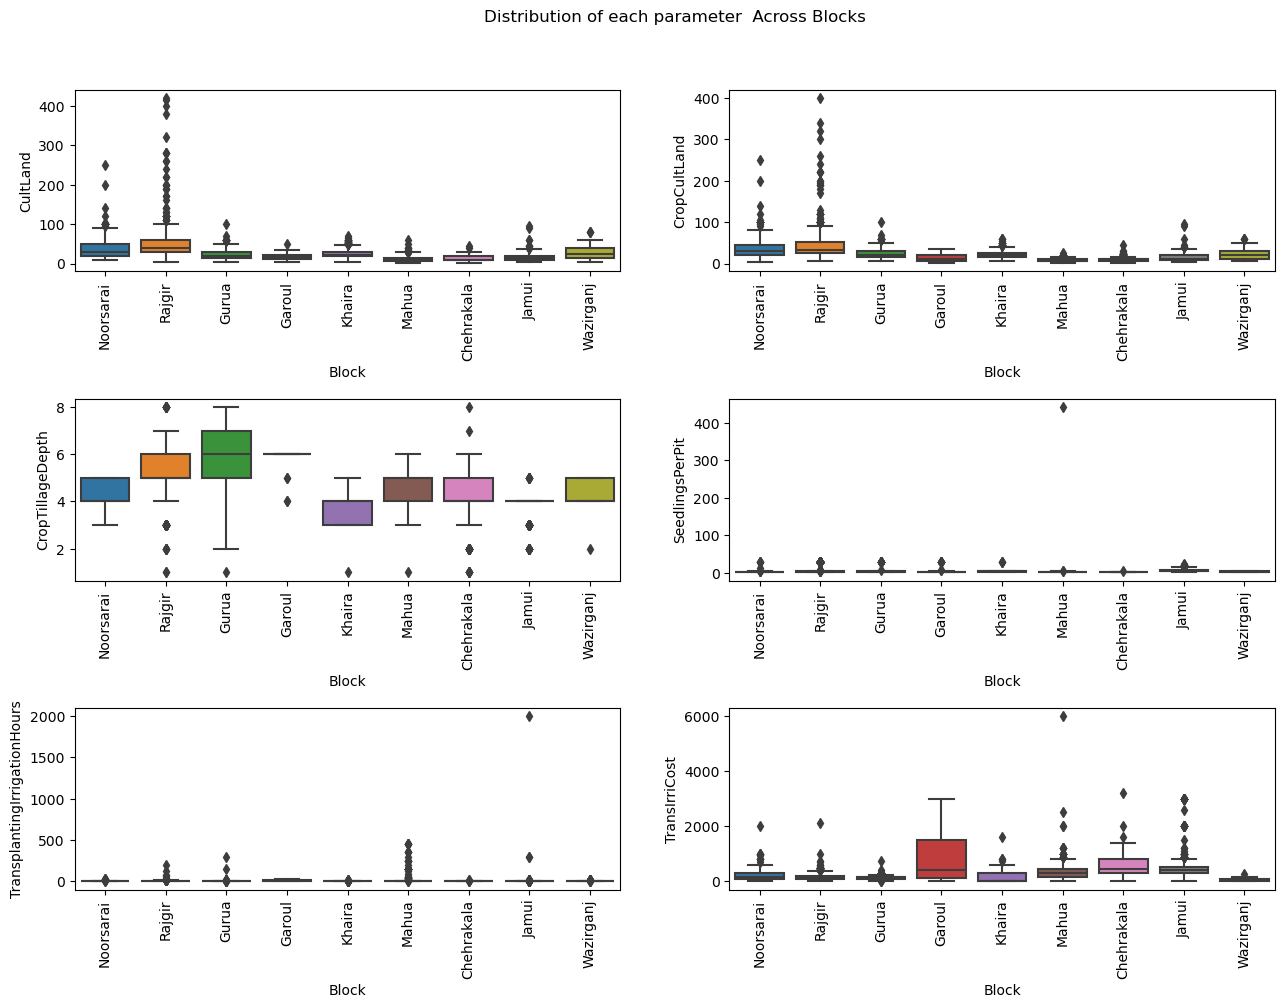

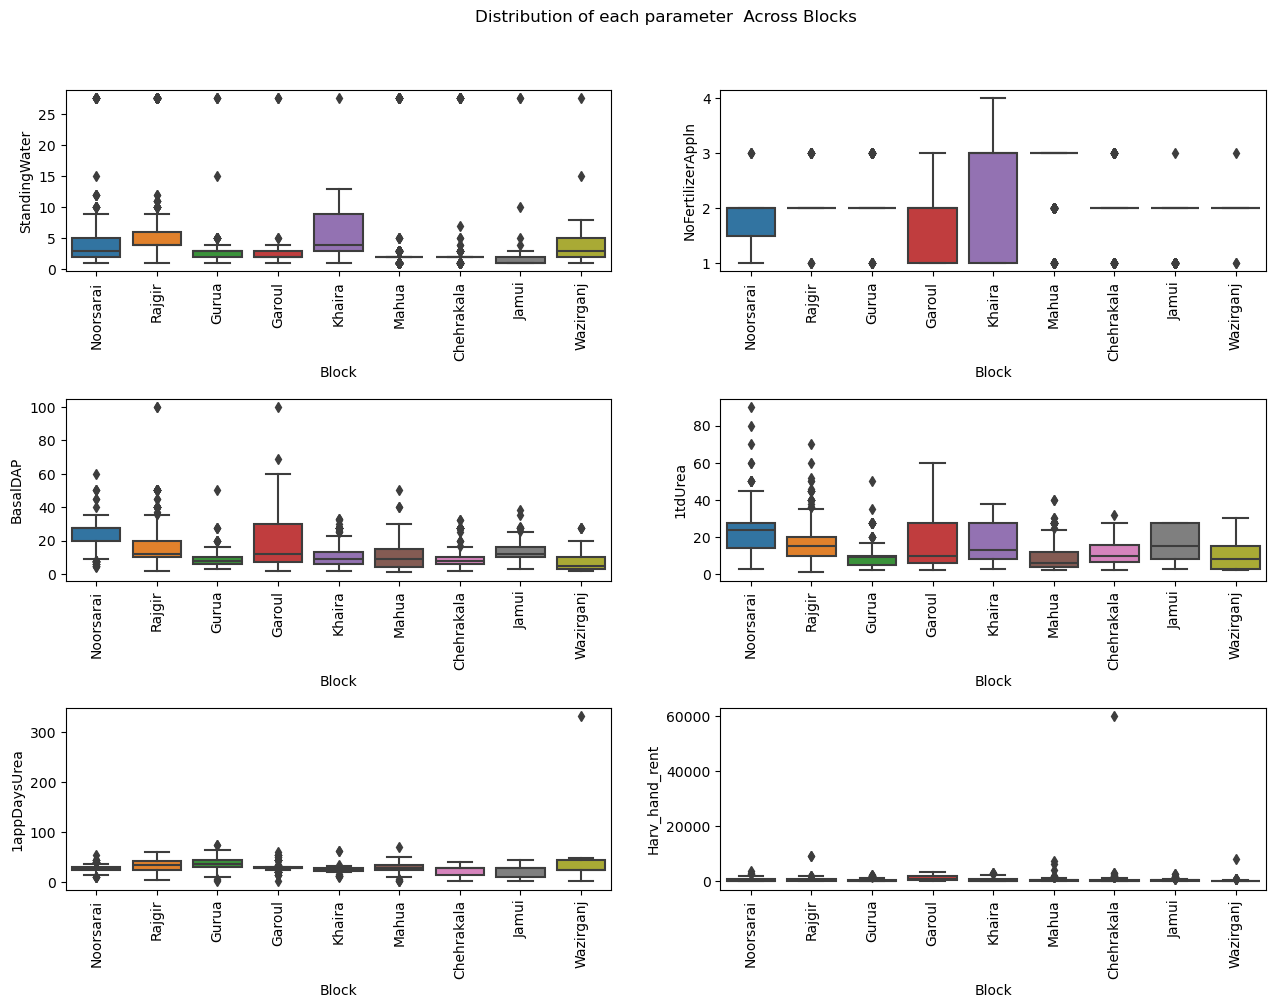

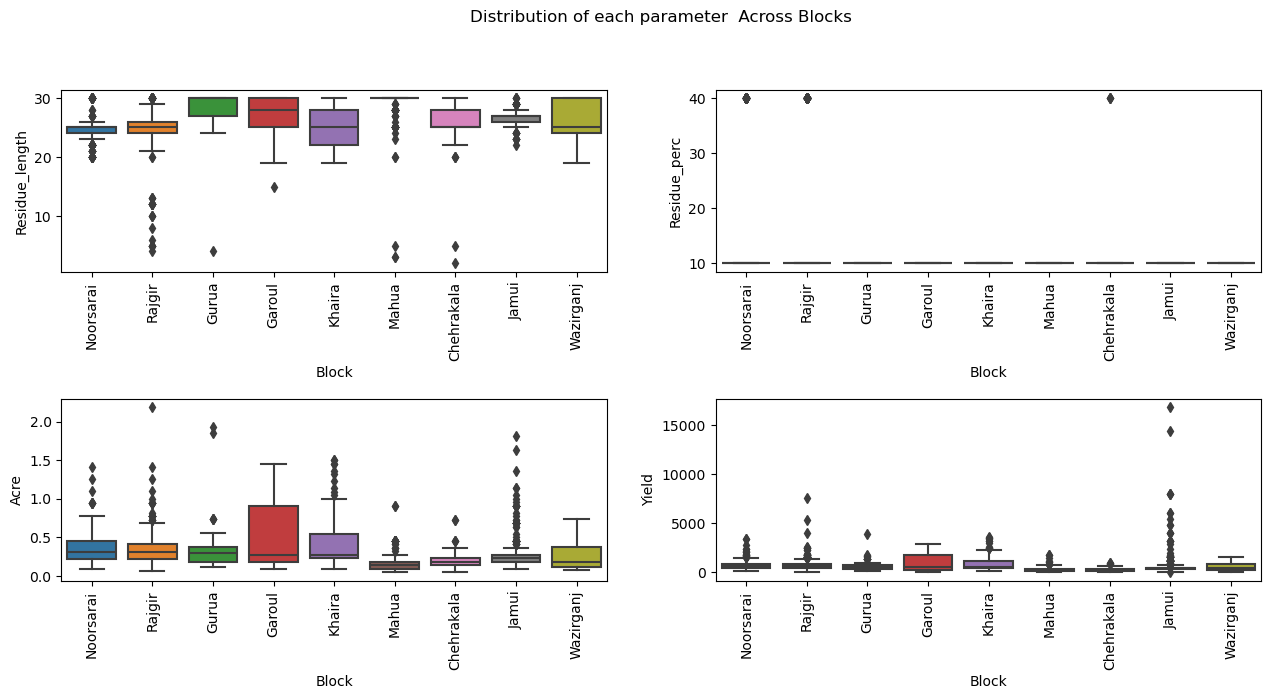

In [10]:
def DistributionAcrossCity(start,end):
    i=1
    plt.figure(figsize=(20, 10))
    for col in numericDataColumns[start:end]:
        plt.subplot(3,2,i)
        sns.boxplot(x='Block', y=col, data=workingData)
        plt.subplots_adjust(left=0.2,right=0.8,top=0.9,bottom=0.1,wspace=0.2
                        ,hspace=0.7)
        plt.suptitle("Distribution of each parameter  Across Blocks")
        plt.xticks(rotation=90)
        i=i+1
    plt.show()
DistributionAcrossCity(0,6)
DistributionAcrossCity(6,12)
DistributionAcrossCity(12,16)

### 4. Feature Engineering 
#### Creating function that get the boundary for outliers

In [11]:
def Outlier(data):
    Q3=np.percentile(data,75)
    Q1=np.percentile(data,25)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return [lower,upper]


#### Removing Outlier of the target variable

In [12]:
OutlierBound=Outlier(workingData['Yield'])
lower=OutlierBound[0]
upper=OutlierBound[1]
workingData=workingData[workingData['Yield']>=lower]
workingData=workingData[workingData['Yield']<=upper]


#### Distribution of target variable Across different Category

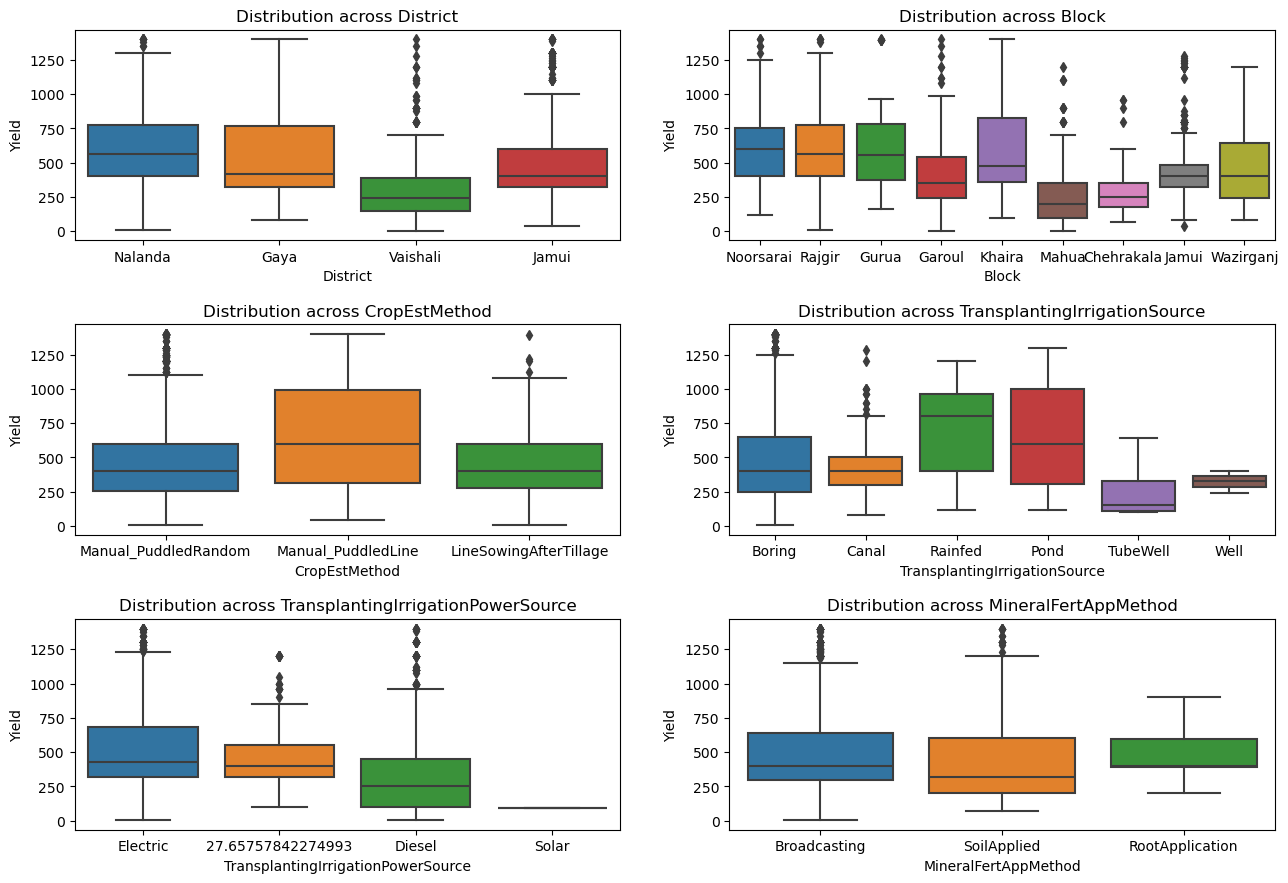

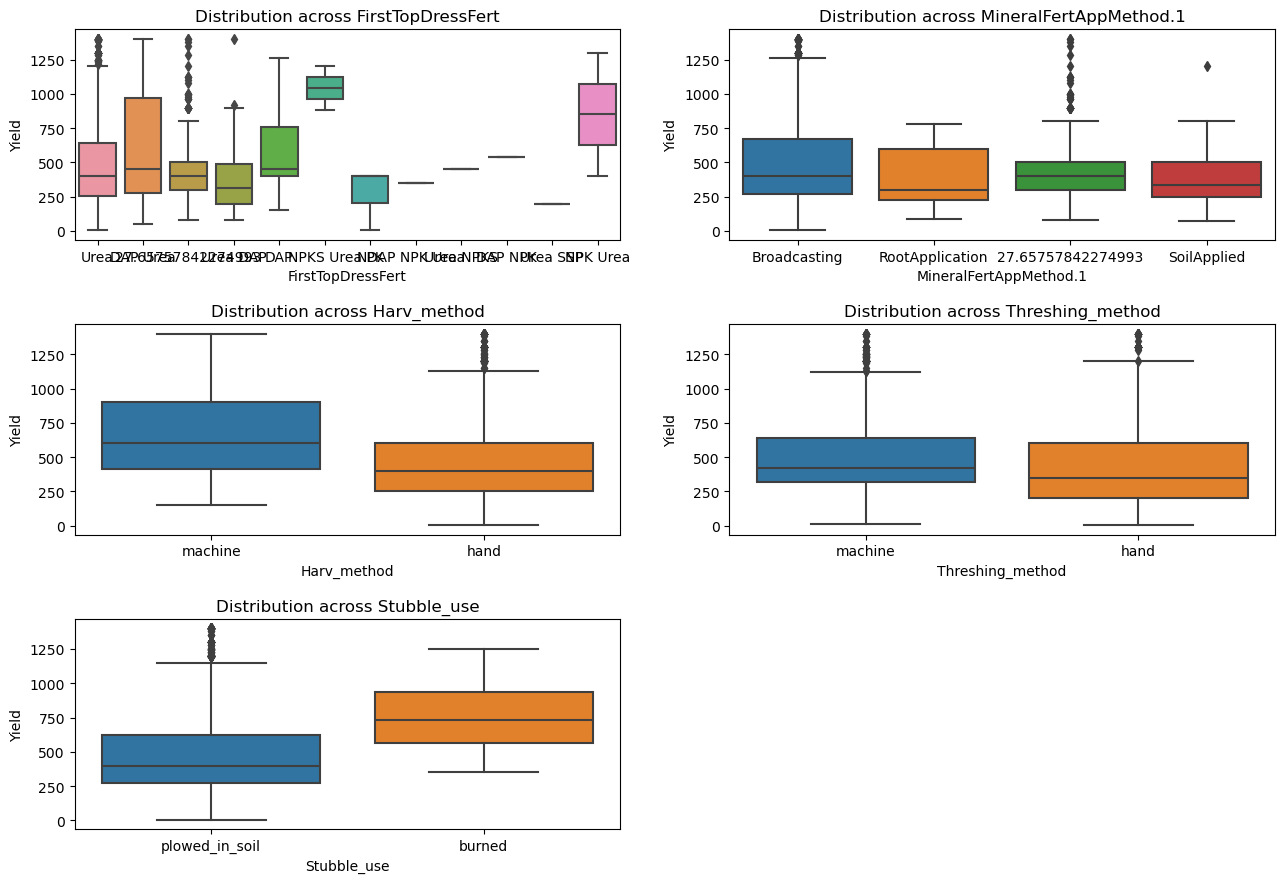

In [13]:
#Getting all Categorical Column names
allColumns=workingData.columns.tolist()
CategoricalColumn=[col for col in allColumns if type(workingData[col][1])==str and len(workingData[col].unique())<16]
# Creating function that will plot the graph
def DistributionAcrossCategory(start,end):
    i=1
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(left=0.2,right=0.8,top=0.9,bottom=0.1,wspace=0.2
                        ,hspace=0.4)
    for col in CategoricalColumn[start:end]:
        plt.subplot(3,2,i)
        plt.title(f'Distribution across {col}')
        sns.boxplot(x=col,y='Yield',data=workingData)
        i=i+1
    plt.show()
DistributionAcrossCategory(0,6)
DistributionAcrossCategory(6,12)


### 5. Data Preprocessing
#### Encoding of categorical data

In [14]:
CategoricalDataSet=workingData.select_dtypes(include=['object']).copy()
CategoricalColumnName=[col for col in CategoricalDataSet.columns]
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
for col in CategoricalColumnName:
    workingData[col] = workingData[col].astype('category')
    workingData[col] = workingData[col].cat.codes
workingData['TransplantingIrrigationPowerSource']

0       2
1       2
2       2
4       2
5       2
       ..
3865    2
3866    1
3867    2
3868    0
3869    2
Name: TransplantingIrrigationPowerSource, Length: 3184, dtype: int8

### 6. Machine Learning 
#### Plotting scatter plot

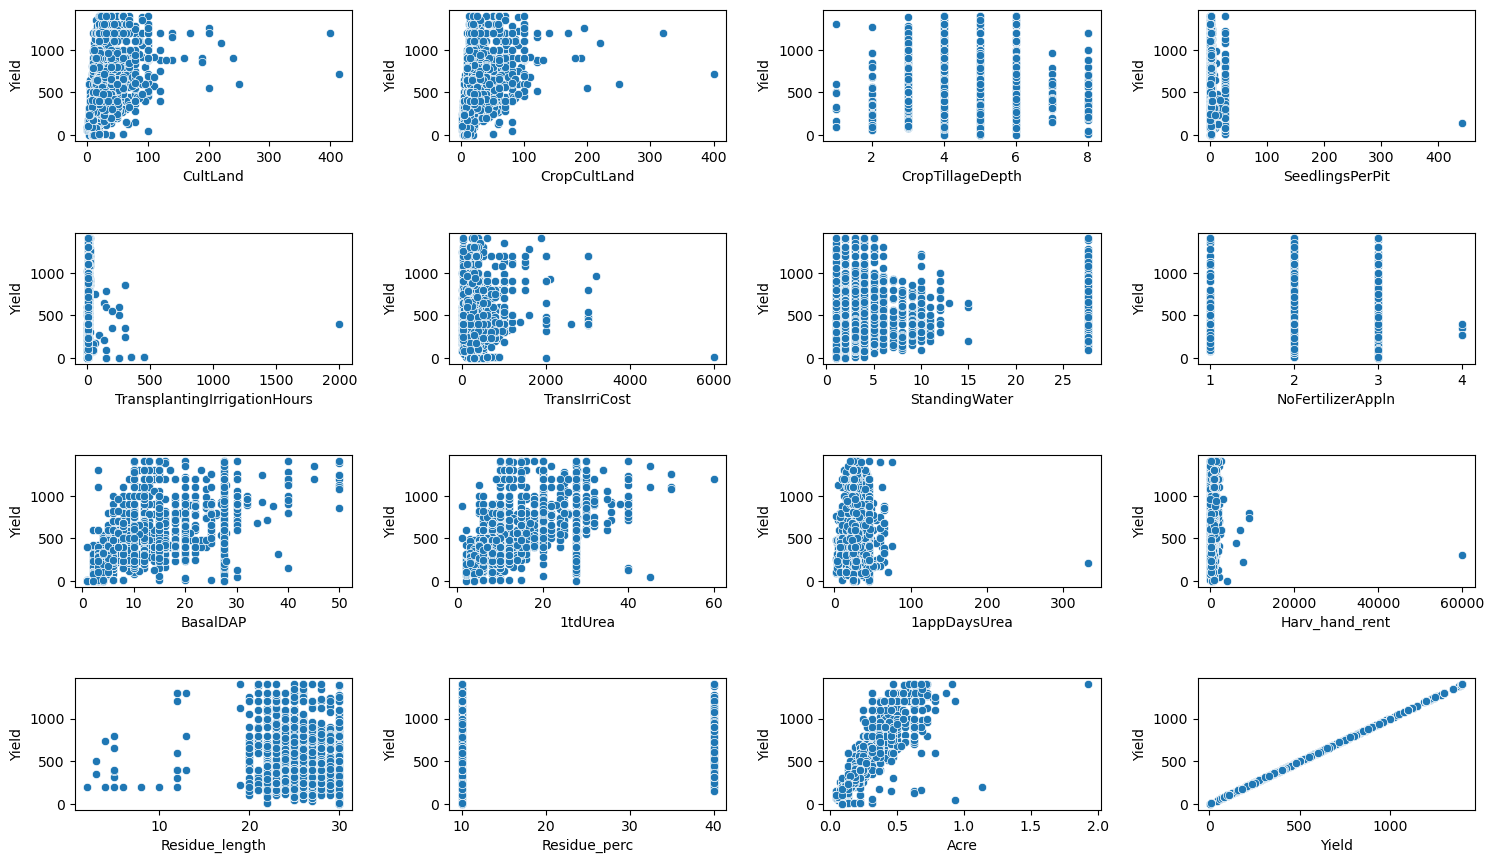

In [15]:
def Scatter(start,end):
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(left=0.1,right=0.8,top=0.9,bottom=0.1,wspace=0.35
                        ,hspace=0.7)
    i=1
    for col in numericDataColumns[start:end]:
        plt.subplot(4,4,i)
        sns.scatterplot(y=workingData['Yield'],x=workingData[col])
        i=i+1
    plt.show()
Scatter(0,16)


#### Checking the correlation between the numerical columns

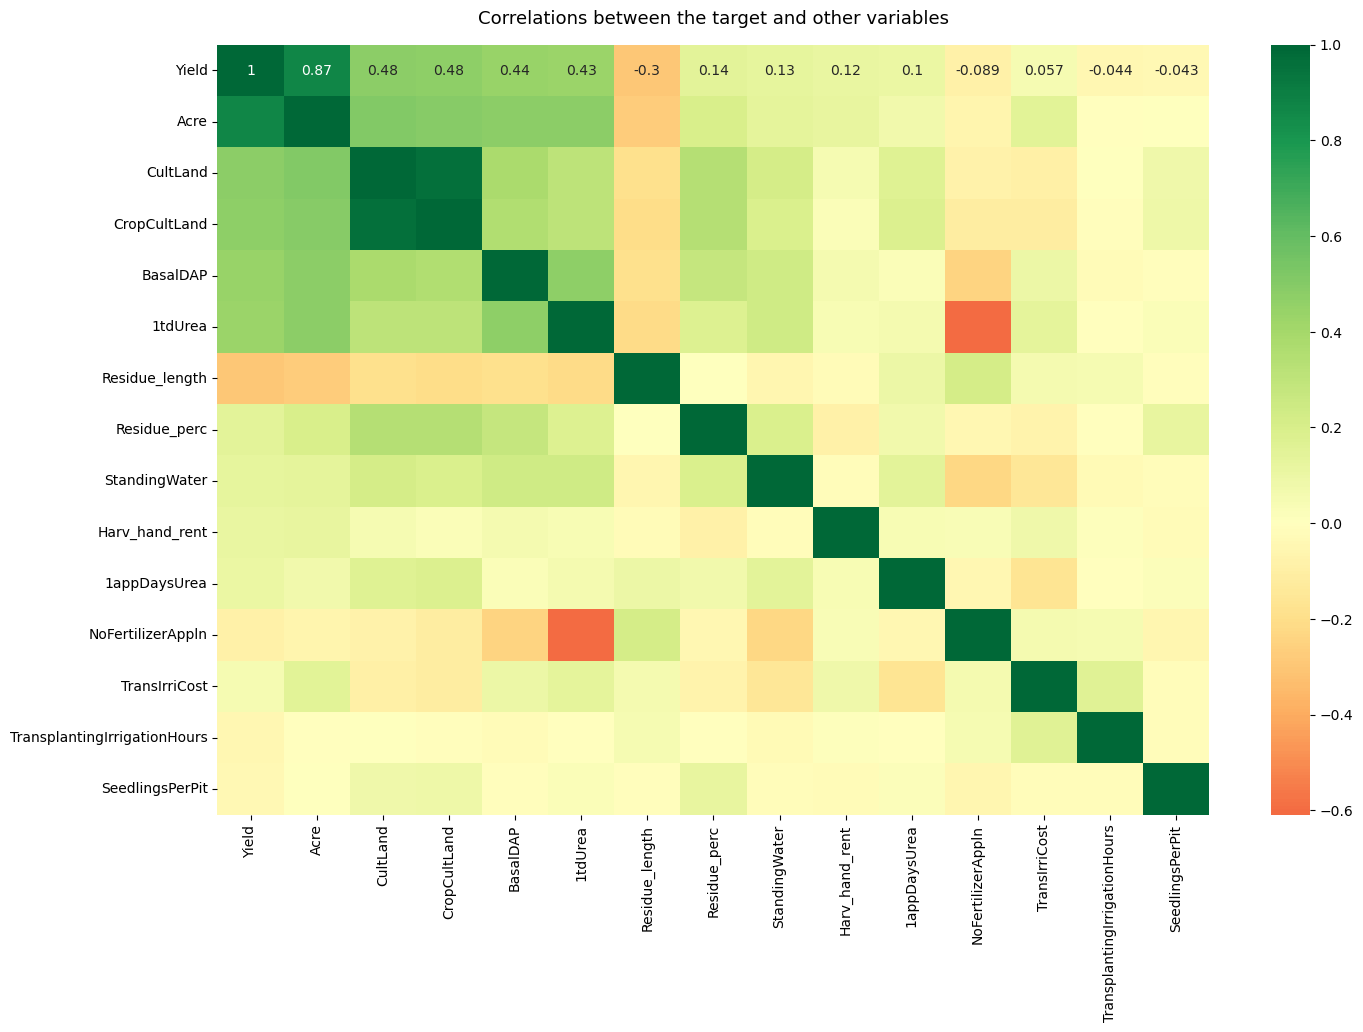

In [16]:
plt.figure(figsize=(16,10))
top10_corrs = abs(workingData[numericDataColumns].corr()['Yield']).sort_values(ascending = False).head(15)
corr = workingData[numericDataColumns][list(top10_corrs.index)].corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 13})
plt.show()

In [17]:
numericDataColumns.extend(CategoricalColumnName)
X=workingData[numericDataColumns].drop(['Yield'],axis=1)
Y=workingData['Yield']

In [18]:
!pip install lightgbm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from pathlib import Path

In [19]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LGBMRegressor()
model.fit(X_train, y_train)

# Local score
y_pred = model.predict(X_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1442
[LightGBM] [Info] Number of data points in the train set: 2547, number of used features: 38
[LightGBM] [Info] Start training from score 476.246957
Local RMSE: 89.61245544418517
